In [1]:
# Some sample questions:

# Q1. The sensor will overestimate the PM concentration in humid conditions (relative humidty RH > ~75%) and will
# understimate the PM concentrations in dry conditions (RH < ~50%) -> characterise dependency and come up with
# a correction method.

# Q2. How to deal with intrinsic sensor to sensor variability?

# Q3. Are there areas in Leuven that show a systematic higher pollution than others? Can this be linked to traffic,
# to agricultural activities?

# Q4. Identify areas with high concentration of wood stoves (peaks in winter during evening/night)?

# Q5. Is there any indication that there is more PM in areas with heavy traffic?

# Q6. Develop a valuable method for real-time interpolation (+ how to handle instantaneous peaks)?

# Q7. (Check LeuvenairGenPresnt.pptx)
# Best,
# I sometimes don't know how to interpret the graphs?
# Sometimes I see peaks at midnight and around 3 am. Red?
# Now the cars have been moving for a few hours: ie acceleration, stopping, acceleration and ... the measurement says: green
# Please provide some explanation if possible.

In [2]:
# imports
import pandas as pd
import numpy as np
from myutils.utility import readJson, getSensorData, interpolate1D, getSensorInterpolatedData 
from matplotlib import pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
# This is going to take some time ~1-5 min
fields = getSensorData('./LEUVENAIRmeta_final.json', './LEUVENAIRfulldump2018.csv')

Note: sensors 8799 and 8827 are repeated in the json file!
The complete pandas frame has shape  (13889081, 10)
sensor: 6561  1st obs: 2018-01-30 00:00:27  last: 2018-12-31 23:59:06 median dt:  2  min, total obs: 234793
sensor: 8745  1st obs: 2018-01-30 00:01:56  last: 2018-12-31 23:58:33 median dt:  2  min, total obs: 142288
sensor: 8765  1st obs: 2018-01-30 00:00:34  last: 2018-12-31 23:58:43 median dt:  2  min, total obs: 194023
sensor: 8769  1st obs: 2018-04-22 11:15:17  last: 2018-12-31 23:58:11 median dt:  2  min, total obs: 144499
sensor: 8773  1st obs: 2018-04-05 18:45:47  last: 2018-12-24 02:28:28 median dt:  2  min, total obs: 135392
sensor: 8775  1st obs: 2018-02-01 21:41:57  last: 2018-06-01 06:03:30 median dt:  2  min, total obs: 61982
sensor: 8777  1st obs: 2018-02-02 00:02:09  last: 2018-12-31 23:57:43 median dt:  2  min, total obs: 191768
sensor: 8779 did not record any observation.
sensor: 8781  1st obs: 2018-02-01 21:42:44  last: 2018-12-31 23:58:11 median dt:  2  min,

sensor: 9631  1st obs: 2018-02-09 11:01:36  last: 2018-06-28 17:37:13 median dt:  2  min, total obs: 59178
sensor: 9633  1st obs: 2018-02-10 15:19:33  last: 2018-12-31 23:59:42 median dt:  2  min, total obs: 164500
sensor: 9635  1st obs: 2018-02-09 08:21:39  last: 2018-12-31 23:59:56 median dt:  2  min, total obs: 188724
sensor: 9637  1st obs: 2018-02-08 09:08:25  last: 2018-12-31 23:57:58 median dt:  2  min, total obs: 173580
sensor: 9639  1st obs: 2018-02-08 15:07:31  last: 2018-12-20 16:47:04 median dt:  2  min, total obs: 158470
sensor: 9643  1st obs: 2018-02-20 22:20:20  last: 2018-12-31 23:59:22 median dt:  2  min, total obs: 174476
sensor: 9753  1st obs: 2018-02-12 16:32:22  last: 2018-12-31 23:58:53 median dt:  2  min, total obs: 182917
sensor: 9801  1st obs: 2018-02-11 19:44:55  last: 2018-12-31 23:58:25 median dt:  2  min, total obs: 182042
sensor: 9812  1st obs: 2018-02-11 19:14:34  last: 2018-12-31 23:57:49 median dt:  2  min, total obs: 161731
sensor: 9825  1st obs: 2018-0

In [4]:
# Get all the variable names
varname = list(pd.read_csv('./LEUVENAIRfulldump2018.csv', skiprows=0, nrows = 0, usecols = None).columns)
print('All variable names are :', varname)

All variable names are : ['DATEUTC', 'LAT', 'LON', 'SDS011ID', 'PM2.5', 'PM10', 'DHTID', 'TEMPERATURE', 'HUMIDITY', 'OBSID']


Extracting data over duration  1 days 00:00:00  starting at  2018-04-01 00:00:00
Sampling resolution =  1  minute


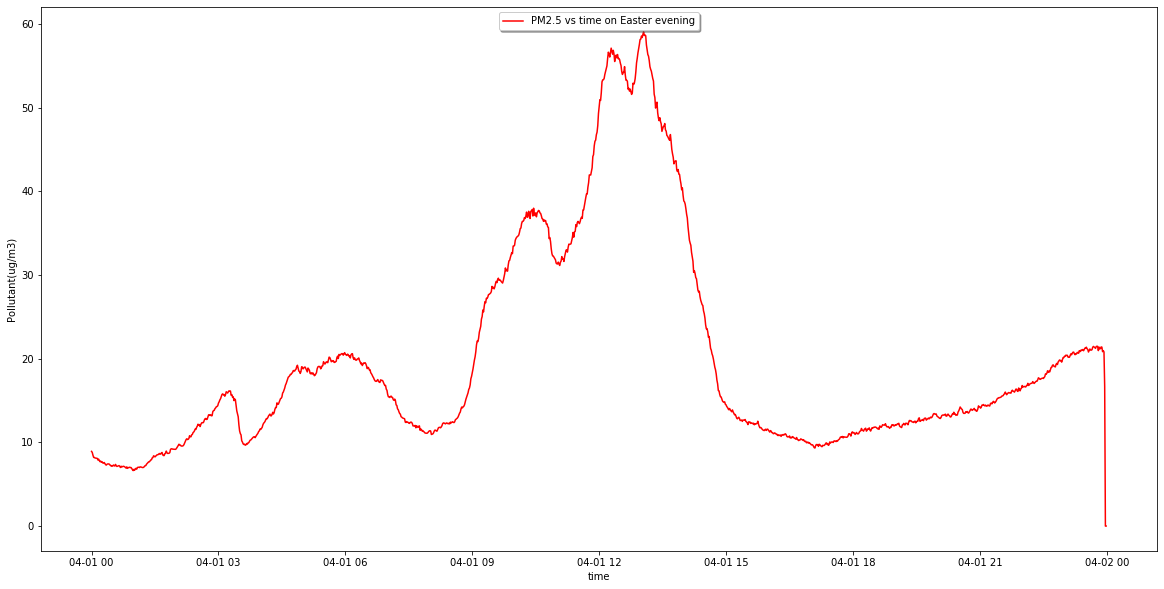

In [7]:
# Visible peak in PM2.5 at Easter
X, Y, xaxis = getSensorInterpolatedData(fields,tstart='2018-04-01 00:00:00',tstop='2018-04-02 00:00:00',fid=4)
plt.plot(xaxis,np.squeeze(np.nanmedian(Y,axis=0)), 'r', label = 'PM2.5 vs time on Easter evening')
left, right = plt.xlim()
plt.xlim(left,right)
plt.xlabel('time')
plt.ylabel('Pollutant(ug/m3)')
legend = plt.legend(loc='upper center', shadow=True)
fig = plt.gcf()
fig.set_size_inches(20, 10)